In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [19]:
df=pd.read_csv("loan-train.csv")
print(df)


      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN           

In [21]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [25]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [31]:
df.shape

(614, 13)

In [33]:
pd.crosstab(df["Credit_History"],df["Loan_Status"])

Loan_Status,N,Y
Credit_History,,
0.0,82,7
1.0,97,378


<Axes: >

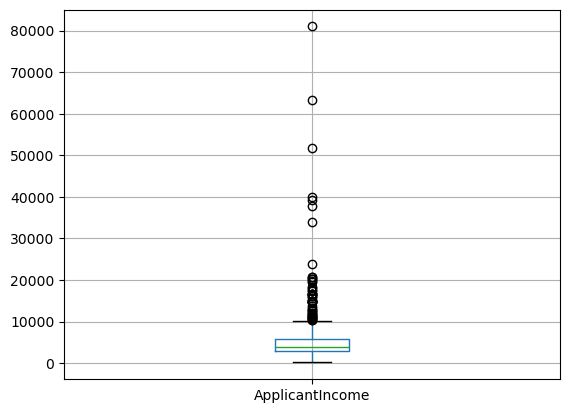

In [35]:
df.boxplot('ApplicantIncome')

<Axes: >

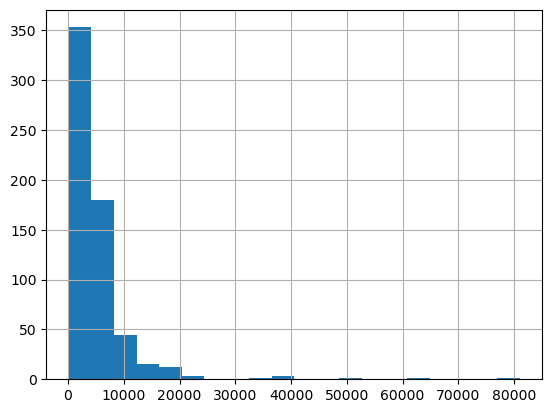

In [39]:
df['ApplicantIncome'].hist(bins=20)

<Axes: >

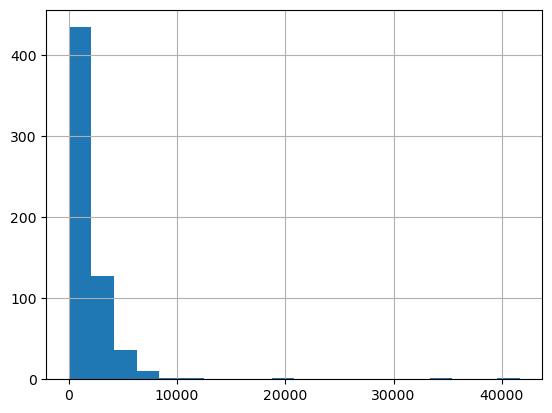

In [41]:
df['CoapplicantIncome'].hist(bins=20)

<Axes: xlabel='ApplicantIncome', ylabel='Education'>

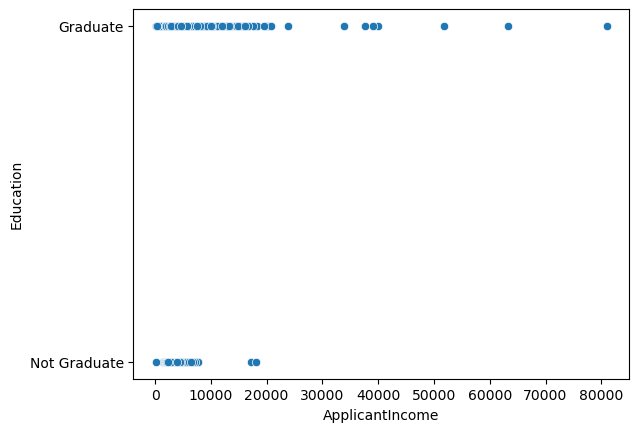

In [65]:
sns.scatterplot(data=df ,x='ApplicantIncome' ,y='Education')


<Axes: >

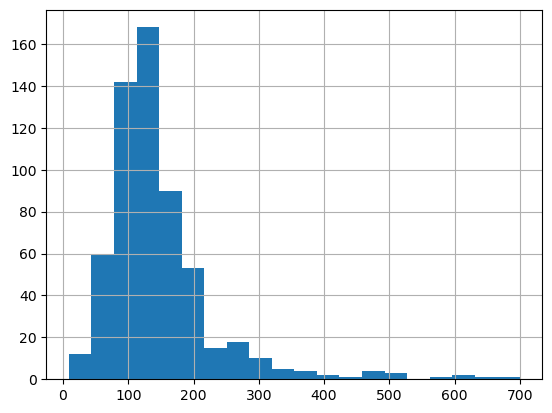

In [83]:
df['LoanAmount'].hist(bins=20)

# The LoanAmount distribution is slightly right-skewed, so we are going to normalize it.

<Axes: >

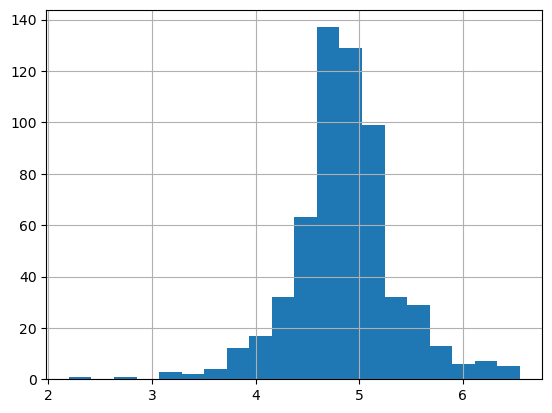

In [89]:
df['lamt_log']=np.log(df['LoanAmount'])
df['lamt_log'].hist(bins=20)

# Te LoanAmount has been normalized.

# np.log(df['LoanAmount']): Computes the natural logarithm of each value in the 'LoanAmount' column. Logarithmic transformations are often used to handle skewed data distributions because they compress large values and expand small values, helping to normalize the distribution.

# df['lamt_log'].hist(bins=20): Visualizes the distribution of the transformed data ('lamt_log' column) using a histogram. Histograms are useful for understanding the frequency distribution of numerical data, showing how data points are distributed across different ranges or bins.

# NOW WE WILL CALCULATE (Total number of null values that exist in the each of the variable)

In [93]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
lamt_log             22
dtype: int64

In [119]:
df['Gender'].fillna(df['Gender'].mode()[0])

# df['Gender'].fillna(df['Gender'].mode(), inplace=True) effectively replaces any missing values in the 'Gender' column with its most common value, ensuring that the column no longer contains null values.

In [117]:
df['Married'].fillna(df['Married'].mode()[0])

# line of code replaces any missing values in the 'Married' column with its most common value, ensuring that the column no longer contains null values after execution.

In [113]:
df['Dependents'].fillna(df['Dependents'].mode()[0])

In [115]:
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [125]:
df.LoanAmount=df.LoanAmount.fillna(df.LoanAmount.mean())
df.lamt_log=df.lamt_log.fillna(df.lamt_log.mean())

In [160]:
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])

In [162]:
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [164]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
lamt_log             0
dtype: int64

# The code `df['ALLDATATYPE'].fillna(df['ALLDATATYPE'].mode()[0]/mean())` effectively replaces missing values in each column with its most frequent value, ensuring that all null values are handled. Checking for null values using `df.isnull().sum()` confirms that the dataframe no longer contains any null values.

# The total sum of `ApplicantIncome` and `CoapplicantIncome` was not normalized and was right-skewed. To normalize it, we will add these incomes together and then apply a logarithmic transformation.

<Axes: >

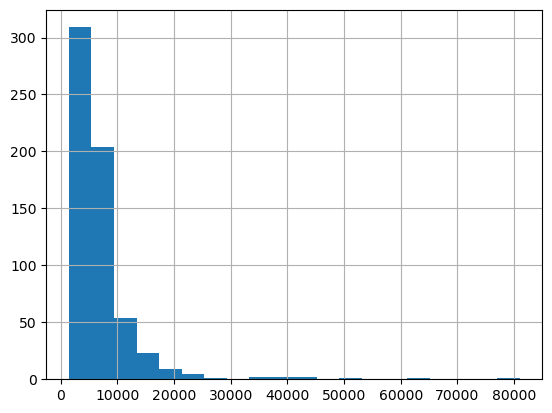

In [168]:
df['TotalIncome']=df['ApplicantIncome']+df['CoapplicantIncome']
df['TotalIncome'].hist(bins=20)

# THE UPPER GRAPH IS NOT NORMALISED AND IS RIGHT SKEWD

<Axes: >

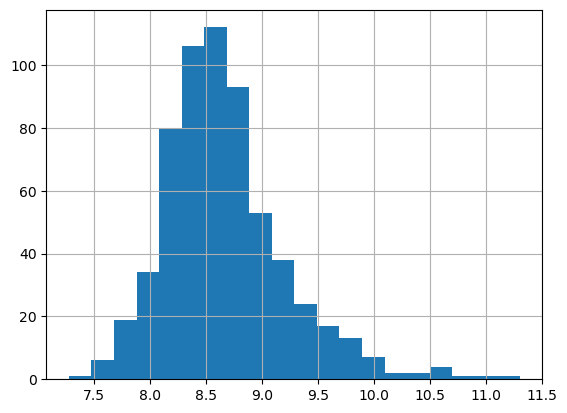

In [172]:
df['TotalIncomeLOG']=np.log(df['TotalIncome'])
df['TotalIncomeLOG'].hist(bins=20)

In [174]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,lamt_log,TotalIncome,TotalIncomeLOG
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,4.857444,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,4.852030,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515


# DIVIDE THE DATA INTO DEPENDENT AND INDEPENDENT VARIABLE X=INDEPENDENT VAR,Y=DEPENDENT VAR

In [178]:
X=df.iloc[:,np.r_[1:5,9:11,13:15]].values
Y=df.iloc[:,12].values

# FOR X  df.iloc[:, ...] is used to select specific rows and columns by index.

# np.r_[1:5, 9:11, 13:15] is a numpy function that concatenates slice objects. This creates an array of column indices: [1, 2, 3, 4, 9, 10, 13, 14].

# df.iloc[:, np.r_[1:5, 9:11, 13:15]] selects all rows (:) and the specified columns.

# .values converts the selected DataFrame slice into a numpy array.

# The result is stored in Y, which will be a numpy array containing the values from column 12 of the DataFrame df.

# OUTPUT

In [182]:
X

array([['Male', 'No', '0', ..., 1.0, 4.857444178729352, 5849.0],
       ['Male', 'Yes', '1', ..., 1.0, 4.852030263919617, 6091.0],
       ['Male', 'Yes', '0', ..., 1.0, 4.189654742026425, 3000.0],
       ...,
       ['Male', 'Yes', '1', ..., 1.0, 5.53338948872752, 8312.0],
       ['Male', 'Yes', '2', ..., 1.0, 5.231108616854587, 7583.0],
       ['Female', 'No', '0', ..., 0.0, 4.890349128221754, 4583.0]],
      dtype=object)

In [184]:
Y

array(['Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N',
       'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N

# Import Necessary Libraries:

In [186]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

# Training Set: Used to train the model. The model learns patterns from this data.
# Test Set: Used to evaluate the model. The model's performance on this data gives an indication of how well it will generalize to new data.
# Splitting: train_test_split function splits the dataset into training and test sets, ensuring a fair evaluation of the model's performance.
# train_test_split: This is a function from the sklearn.model_selection module that splits arrays or matrices into random train and test subsets.  
# Splitting the Data

# X: This is the feature matrix that we extracted from the DataFrame. It contains the input features for the model.
# Y: This is the target vector (or labels) that we extracted from the DataFrame. It contains the output labels for the model.

# Parameters of train_test_split:
# X and Y:
# X and Y are the inputs to the train_test_split function.
# X is a 2D array (or DataFrame) containing the features.
# Y is a 1D array (or Series) containing the corresponding labels.
# test_size=0.2 means 20% of the data will be used for testing, and the remaining 80% will be used for training.
# random_state=0 ensures reproducibility by fixing the seed for the random number generator.
# This means every time you run the code with the same random_state, you will get the same train-test split.


In [190]:
print(X_train)

[['Male' 'Yes' '0' ... 1.0 4.875197323201151 5858.0]
 ['Male' 'No' '1' ... 1.0 5.278114659230517 11250.0]
 ['Male' 'Yes' '0' ... 0.0 5.003946305945459 5681.0]
 ...
 ['Male' 'Yes' '3+' ... 1.0 5.298317366548036 8334.0]
 ['Male' 'Yes' '0' ... 1.0 5.075173815233827 6033.0]
 ['Female' 'Yes' '0' ... 1.0 5.204006687076795 6486.0]]


# USING LABEL ENCODER TO SWITCH FROM YES,NO to 0,1
# Label Encoding is a process of converting categorical text data into numerical data. This is essential for many machine learning algorithms that require input features to be in a numerical format.

In [198]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X=LabelEncoder()

In [200]:
for i in range(0,5):
        X_train[:,i]=labelencoder_X.fit_transform(X_train[:,i])

# X_train[:, i] selects all rows (:) and the i-th column of the X_train array.
# labelencoder_X.fit_transform(X_train[:, i]) applies the fit_transform method of LabelEncoder to encode the selected column (X_train[:, i]) into numerical labels.
# fit: This method learns the unique values in the selected column (X_train[:, i]).
# transform: This method converts the learned unique values into numerical labels.

In [202]:
X_train[:,7]=labelencoder_X.fit_transform(X_train[:,7])

In [204]:
X_train

array([[1, 1, 0, ..., 1.0, 4.875197323201151, 267],
       [1, 0, 1, ..., 1.0, 5.278114659230517, 407],
       [1, 1, 0, ..., 0.0, 5.003946305945459, 249],
       ...,
       [1, 1, 3, ..., 1.0, 5.298317366548036, 363],
       [1, 1, 0, ..., 1.0, 5.075173815233827, 273],
       [0, 1, 0, ..., 1.0, 5.204006687076795, 301]], dtype=object)

In [206]:
labelencoder_Y=LabelEncoder()

In [208]:
Y_train=labelencoder_Y.fit_transform(Y_train)

In [210]:
Y_train

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,

In [212]:
for i in range(0,5):
        X_test[:,i]=labelencoder_X.fit_transform(X_test[:,i])

In [ ]:
X_test[:,7]=labelencoder_X.fit_transform(X_test[:,7])

In [214]:
Y_test=labelencoder_Y.fit_transform(Y_test)

In [216]:
X_test

array([[1, 0, 0, 0, 5, 1.0, 4.430816798843313, 7085.0],
       [0, 0, 0, 0, 5, 1.0, 4.718498871295094, 4230.0],
       [1, 1, 0, 0, 5, 1.0, 5.780743515792329, 10039.0],
       [1, 1, 0, 0, 5, 1.0, 4.700480365792417, 6784.0],
       [1, 1, 2, 0, 5, 1.0, 4.574710978503383, 3875.0],
       [1, 1, 0, 1, 3, 0.0, 5.10594547390058, 6058.0],
       [1, 1, 3, 0, 3, 1.0, 5.056245805348308, 6417.0],
       [1, 0, 0, 0, 5, 1.0, 6.003887067106539, 12876.0],
       [1, 0, 0, 0, 5, 0.0, 4.820281565605037, 5124.0],
       [1, 1, 0, 0, 5, 1.0, 4.852030263919617, 5233.0],
       [0, 0, 0, 0, 5, 1.0, 4.430816798843313, 2917.0],
       [1, 1, 1, 0, 5, 1.0, 4.553876891600541, 2895.0],
       [0, 0, 0, 0, 5, 1.0, 5.634789603169249, 8333.0],
       [1, 1, 2, 0, 5, 1.0, 5.4638318050256105, 8667.0],
       [1, 1, 0, 0, 5, 1.0, 4.564348191467836, 14880.0],
       [1, 1, 1, 0, 5, 1.0, 4.204692619390966, 3875.0],
       [1, 0, 1, 1, 5, 1.0, 5.247024072160486, 4311.0],
       [1, 0, 0, 1, 5, 1.0, 4.882801922586371

In [218]:
Y_test

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1])

# SCALING OUR DATA
# StandardScaler is used to standardize features by removing the mean and scaling to unit variance. This preprocessing step is crucial for many machine learning algorithms that assume data is normally distributed and have similar scales.


In [222]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.fit_transform(X_test)

# DecisionTreeClassifier is a popular machine learning model used for classification tasks. It builds a decision tree model based on the training data, which is then used to make predictions.
# criterion='entropy': This specifies the criterion used for splitting nodes. 'entropy' measures the impurity of nodes and is often used in decision tree algorithms.
# random_state=0: This parameter ensures reproducibility of the results. Setting random_state to a fixed number (0 in this case) ensures that the same sequence of random numbers is generated each time you run the code, leading to consistent results.
# X_train: This is the input features (independent variables) used to train the model.
# Y_train: This is the target variable (dependent variable) which the model aims to predict based on X_train.
# fit(X_train, Y_train): This method fits the decision tree model to the training data, learning how to predict Y_train from X_train based on the specified criterion and random_state.

In [228]:
from sklearn.tree import DecisionTreeClassifier
DTClassifier=DecisionTreeClassifier(criterion='entropy',random_state=0)
DTClassifier.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

# Decision trees are advantageous for their interpretability and ability to handle both numerical and categorical data effectively.

# Predict the values of SET DATA SET

In [234]:
PredictionofY=DTClassifier.predict(X_test)
print(PredictionofY)

[0 0 0 1 0 1 0 0 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 0 1 0 1 0 0 1
 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 0 0 0 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0
 1 1 1 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 0 1 1 1 1 1 0 1 0 1 1 0 1
 1 0 1 0 0 0 0 1 1 1 0 1]


# Model Prediction: The predict method uses the trained model to make predictions on new data.
# Test Data: X_test is the input data for which you want to predict the target labels.
# Predicted Labels: PredictionofY stores the predicted target labels for the test set.

# Purpose: This line imports the metrics module from sklearn. The metrics module contains various functions to measure the performance of machine learning models.
# Explanation: We will use the accuracy_score function from this module to calculate the accuracy of our model.
# metrics.accuracy_score(Y_test, PredictionofY): This function calculates the accuracy of the predictions.
# Y_test: This is the true labels of the test set.
# PredictionofY: This is the predicted labels generated by the model.
# accuracy_score returns the proportion of correctly predicted labels out of all labels.
# The accuracy_score function measures how many predictions made by the model match the true labels.

In [240]:
from sklearn import metrics
accuracy = metrics.accuracy_score(Y_test, PredictionofY) * 100
print("THE ACCURACY WE GOT IS:", int(accuracy), "%")

THE ACCURACY WE GOT IS: 70 %


# WE HAVE TO IMPROVE ACCURACY SO ANOTHER METHOD
# GaussianNB is a type of Naive Bayes classifier that assumes that the features follow a Gaussian (normal) distribution. It's commonly used for classification tasks.
# Instance Creation: NBC is created as an instance of GaussianNB.
# Explanation: This instance will be used to train the Naive Bayes model on the training data.

In [246]:
from sklearn.naive_bayes import GaussianNB
NBC=GaussianNB()
NBC.fit(X_train,Y_train)

GaussianNB()

In [248]:
PredictionofY=NBC.predict(X_test)
print(PredictionofY)

[1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 1 1 1 1 1 0 1]


In [250]:
accuracy = metrics.accuracy_score(Y_test, PredictionofY) * 100
print("THE ACCURACY WE GOT IS:", int(accuracy), "%")

THE ACCURACY WE GOT IS: 83 %


# Now we are testing are Naive_Bayes algorithm
# Loading are test file

In [278]:
testdata=pd.read_csv('loan-test.csv')

In [280]:
testdata.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [282]:
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [284]:
testdata.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [314]:
testdata['Gender'] = testdata['Gender'].fillna(testdata['Gender'].mode()[0])
testdata['Dependents'] = testdata['Dependents'].fillna(testdata['Dependents'].mode()[0])
testdata['Self_Employed'] = testdata['Self_Employed'].fillna(testdata['Self_Employed'].mode()[0])
testdata['Loan_Amount_Term'] = testdata['Loan_Amount_Term'].fillna(testdata['Loan_Amount_Term'].mode()[0])
testdata['Credit_History'] = testdata['Credit_History'].fillna(testdata['Credit_History'].mode()[0])

In [320]:
testdata.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           5
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

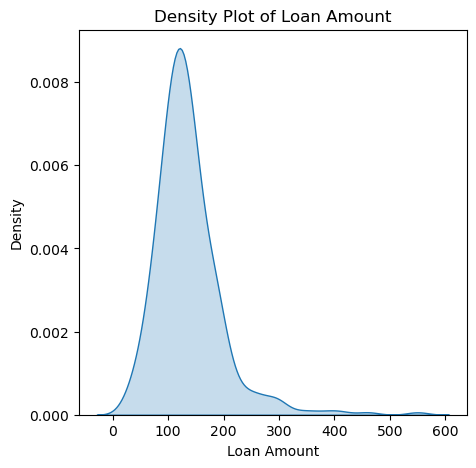

In [328]:
plt.figure(figsize=(5, 5))
sns.kdeplot(testdata['LoanAmount'].dropna(), fill=True)
plt.title('Density Plot of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Density')
plt.show()

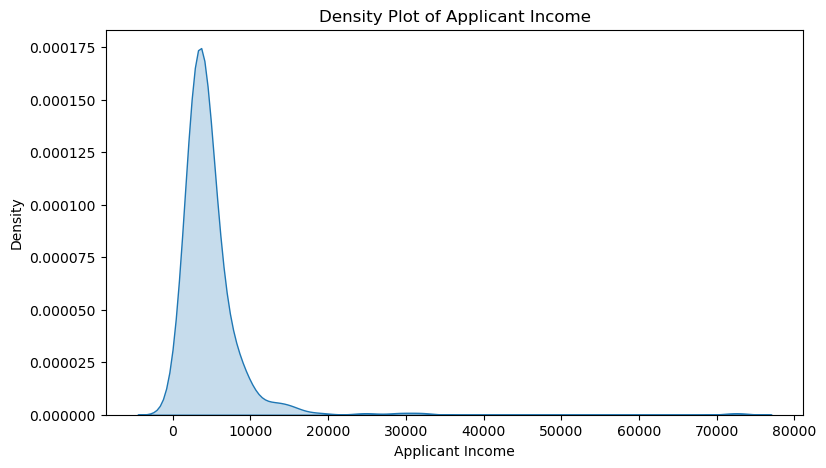

In [338]:
plt.figure(figsize=(9, 5))
sns.kdeplot(testdata['ApplicantIncome'].dropna(), fill=True)
plt.title('Density Plot of Applicant Income')
plt.xlabel('Applicant Income')
plt.ylabel('Density')
plt.show()

In [344]:
testdata['LoanAmount'] = testdata['LoanAmount'].fillna(testdata['LoanAmount'].mean())

In [352]:
testdata['LoanAmount_log'] =np.log(testdata['LoanAmount'])
testdata.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
LoanAmount_log       0
dtype: int64

In [356]:
testdata['TotalIncome']=testdata['ApplicantIncome']+testdata['CoapplicantIncome']
testdata['TotalIncome_log']=np.log(testdata['TotalIncome'])

In [358]:
testdata.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,4.700480,5720,8.651724
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,4.836282,4576,8.428581
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,5.337538,6800,8.824678
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban,4.605170,4886,8.494129
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,4.356709,3276,8.094378


In [362]:
test=testdata.iloc[:,np.r_[1:5,9:11,13:15]].values
for i in range(0,5):
    test[:,i]=labelencoder_X.fit_transform(test[:,i])

In [364]:
  test[:,7]=labelencoder_X.fit_transform(test[:,7])

In [366]:
test


array([[1, 1, 0, ..., 1.0, 5720, 207],
       [1, 1, 1, ..., 1.0, 4576, 124],
       [1, 1, 2, ..., 1.0, 6800, 251],
       ...,
       [1, 0, 0, ..., 1.0, 5243, 174],
       [1, 1, 0, ..., 1.0, 7393, 268],
       [1, 0, 0, ..., 1.0, 9200, 311]], dtype=object)

In [368]:
test=ss.fit_transform(test)

In [370]:
Prediction=NBC.predict(test)

In [372]:
Prediction

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

# 1->Eligible 0->Not Eligible

                                 # Loan Eligibility Prediction